## Using the US_Heart_Rate data and fitting different models to it

### Will keep importing libraries wherever neede

In [1]:
import pandas as pd
import numpy as np

### Reading the data

In [53]:
df = pd.read_csv("US_Heart_Patients.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [54]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


### Dimensions of the data

In [66]:
df.shape #No of rows=4240, no of cols=16

(4240, 16)

In [63]:
# Basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [67]:
# Name of all the columns
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Details of the columns:-

In [69]:
# Checking the data for missing values
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### Handling missing values by filling the space with the mean of the respective column

In [76]:
columns_to_fill = ['cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())

In [78]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.316023,-0.052203,-0.004550,0.005853,0.015693,-0.070064,-0.035879,0.058199,0.081705,-0.116913,0.005718,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192534,0.122036,0.057679,0.306799,0.101314,0.260691,0.394053,0.205586,0.135578,-0.012839,0.116951,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008296,-0.010820,-0.035142,-0.081726,-0.038749,-0.023504,-0.129496,-0.061919,-0.137476,-0.054176,-0.034228,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.767055,-0.048621,-0.032980,-0.103710,-0.044285,-0.046211,-0.130281,-0.107933,-0.167483,0.062678,-0.054062,0.019448
cigsPerDay,0.316023,-0.192534,0.008296,0.767055,1.000000,-0.045847,-0.032711,-0.066444,-0.037086,-0.026182,-0.088523,-0.056473,-0.092888,0.075257,-0.056020,0.057646
BPMeds,-0.052203,0.122036,-0.010820,-0.048621,-0.045847,1.000000,0.115008,0.259125,0.051584,0.078973,0.252023,0.192387,0.099586,0.015172,0.048925,0.086805
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.115008,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.024856,-0.017674,0.018065,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066444,0.259125,0.074791,1.000000,0.077752,0.162683,0.696656,0.615840,0.300599,0.146777,0.082757,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037086,0.051584,0.006955,0.077752,1.000000,0.040161,0.111265,0.050260,0.086282,0.048986,0.605709,0.097344
totChol,-0.070064,0.260691,-0.023504,-0.046211,-0.026182,0.078973,0.000105,0.162683,0.040161,1.000000,0.207436,0.163423,0.115013,0.090678,0.044710,0.081807


### Dropping the column 'education' as it does not contribute to the risk of getting heart diseases

In [79]:
columns_to_drop = ['education']
df = df.drop(columns=columns_to_drop)

In [80]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.000000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.000000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.000000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.000000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.000000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,0,52,0,0.0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,0,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


### Checking to see if we have any outliers in the data

In [81]:
from scipy import stats

# Specify the column containing numerical data
column_to_check = ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

# Calculate Z-Scores
z_scores = stats.zscore(df[column_to_check])

# Define a Z-Score threshold for outlier detection
z_threshold = 3

# Find outliers
outliers = df[abs(z_scores) > z_threshold]

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
      male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0      NaN  NaN            NaN         NaN     NaN              NaN   
1      NaN  NaN            NaN         NaN     NaN              NaN   
2      NaN  NaN            NaN         NaN     NaN              NaN   
3      NaN  NaN            NaN         NaN     NaN              NaN   
4      NaN  NaN            NaN         NaN     NaN              NaN   
...    ...  ...            ...         ...     ...              ...   
4235   NaN  NaN            NaN         NaN     NaN              NaN   
4236   NaN  NaN            NaN         NaN     NaN              NaN   
4237   NaN  NaN            NaN         NaN     NaN              NaN   
4238   NaN  NaN            NaN         NaN     NaN              NaN   
4239   NaN  NaN            NaN         NaN     NaN              NaN   

      prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI  heartRate  glucose  \
0              NaN       NaN      NaN    NaN    NaN  NaN 

### Visualizing it through Matplotlib

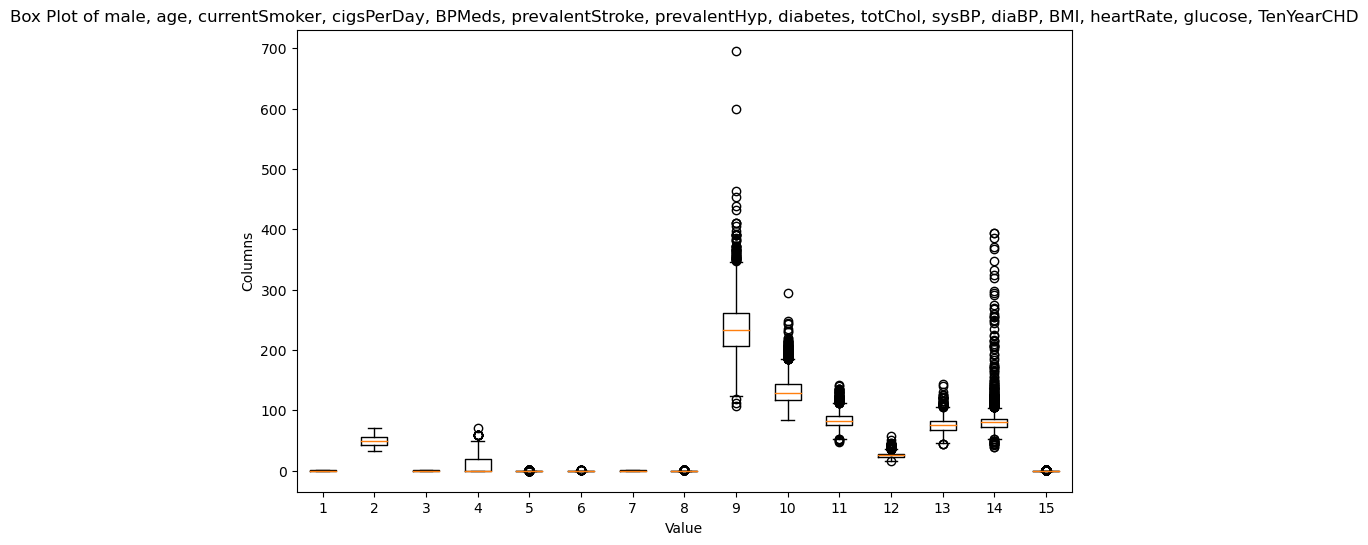

In [84]:
import matplotlib.pyplot as plt

columns_to_visualize = ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


# Creating a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df[columns_to_visualize], vert=True)  # Set vert=False for horizontal box plot

# Join the column names into a single string
column_names_str = ', '.join(columns_to_visualize)


plt.title('Box Plot of ' + column_names_str)
plt.xlabel('Value')
plt.ylabel('Columns')
plt.show()

## Now we can go ahead with our model fitting

### Splitting the data into train and test sets

In [85]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Now, fitting different models and checking the accuracy.

### Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_preds = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_accuracy

0.75

### Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_accuracy

0.8522012578616353

### Gradient Boosting Classifier

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_preds)
gb_accuracy

0.8474842767295597

### Naive Bayes Classifier

In [90]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_preds = nb_clf.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_preds)
nb_accuracy

0.8286163522012578

In [91]:
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Naive Bayes Classifier Accuracy:", nb_accuracy)

Decision Tree Classifier Accuracy: 0.75
Gradient Boosting Classifier Accuracy: 0.8474842767295597
Random Forest Classifier Accuracy: 0.8522012578616353
Naive Bayes Classifier Accuracy: 0.8286163522012578
